# Importing Data and Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
import pandas as pd

# Reimport Data
df = pd.read_csv('AB_NYC_2019.csv', parse_dates = ['last_review'])

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Visualization and Exploratory Data Analysis (EDA)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

## Missing Data

### check the number of null values in each column and print them in descending order:

In [ ]:
# assuming the dataset is stored in a variable called "data"

# count the number of null values in each column
null_counts = df.isnull().sum()

# sort the columns by the number of null values (in descending order)
null_counts = null_counts.sort_values(ascending=False)

# print the null value counts
print(null_counts)


last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Since we will be examining the factors that impact the listing price, columns such as "name" are not pertinent to our analysis.

In [ ]:
df.drop(['host_name','last_review','name' ],axis = 1, inplace = True)

The null values in the 'reviews_per_month' column correspond to the listings where 'number_of_reviews' is zero. Therefore, we can safely fill those null values with 0.

In [ ]:
df[df['number_of_reviews']==0].shape

(10052, 13)

In [ ]:
df.fillna('0', inplace=True)

Examining the different categories provides us with insight into how to approach our analysis.

## Outliers

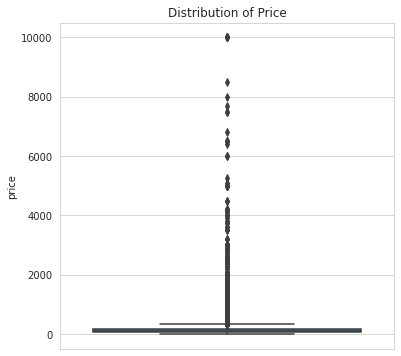

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['price'])
plt.title("Distribution of Price")
plt.show()

There are so many outlier in the price. Let's drop them.

In [ ]:
def remove_outliers(df, column_name):
    # calculer le premier et le troisième quartile de la colonne
    Q1 = df[column_name].quantile(0.01)
    Q3 = df[column_name].quantile(0.99)
    
    # calculer l'écart interquartile (IQR)
    IQR = Q3 - Q1
    
    # déterminer les limites inférieure et supérieure pour les valeurs aberrantes
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # filtrer le DataFrame pour inclure uniquement les valeurs dans la plage acceptable
    filtered_df = df[(df[column_name] > lower_limit) & (df[column_name] < upper_limit)]
    
    # retourner le DataFrame filtré
    return filtered_df

# Supprimer les valeurs aberrantes dans la colonne 'price'
data = remove_outliers(df, 'price')

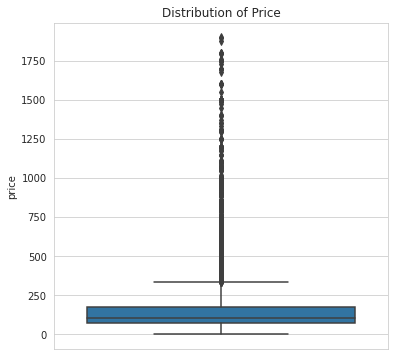

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=data['price'])
plt.title("Distribution of Price")
plt.show()

Je pense que cette fonctionne supprime beaucoup de données donc, on va supprimer les outiliers differement

In [ ]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
df = df[(df['price']<p1) & (df['price']>p2)]

In [ ]:
m1 = df['minimum_nights'].quantile(0.99)
print(m1)

40.0


In [ ]:
df = df[(df['minimum_nights']<m1)]
df['price'].describe()

count    47262.000000
mean       138.905569
std        103.036567
min         31.000000
25%         70.000000
50%        108.000000
75%        175.000000
max        795.000000
Name: price, dtype: float64

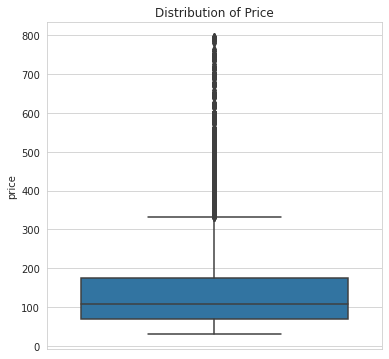

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['price'])
plt.title("Distribution of Price")
plt.show()

### neighbourhoods

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
n_group = df.groupby('neighbourhood_group').describe()
n_group.xs('price',axis = 1)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1009.0,87.756194,70.341288,32.0,50.00,70.0,100.00,680.0
Brooklyn,19488.0,117.488147,85.900570,31.0,60.00,94.0,150.00,795.0
Manhattan,20955.0,173.128323,115.189412,31.0,95.00,149.0,215.00,795.0
Queens,5458.0,96.124038,69.272127,31.0,53.25,75.0,113.75,750.0
Staten Island,352.0,97.303977,76.070489,31.0,50.75,75.0,110.00,700.0


The prices in the dataset vary widely, ranging from as low as 10 to as high as 10000. However, the mean price is below 200.

Text(0.5, 1.0, 'Numbers in Each Neigbourhoods')

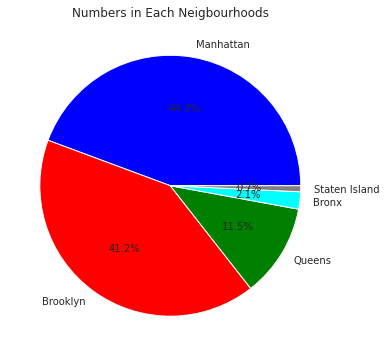

In [ ]:
plt.figure(figsize=(6,6))
numbers = df['neighbourhood_group'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in Each Neigbourhoods')

Manhattan has the most house. Brooklyn follows Manhattan with a big portion. Mostly the rooms are distributed in Brooklyn and Manhattan

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

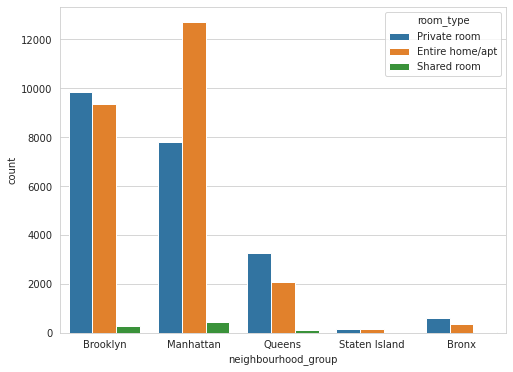

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

Based on the plot, we can observe that Brooklyn and Manhattan are the most in-demand neighborhoods with a higher number of listings. Brooklyn has a relatively even distribution between "private room" and "entire home" listings, while Manhattan has a greater number of home/apartment listings. However, for less popular areas like Staten Island and the Bronx, there are no noticeable differences between them.

## Price Distribution in Each Neighbourhood

Text(0, 0.5, 'Price')

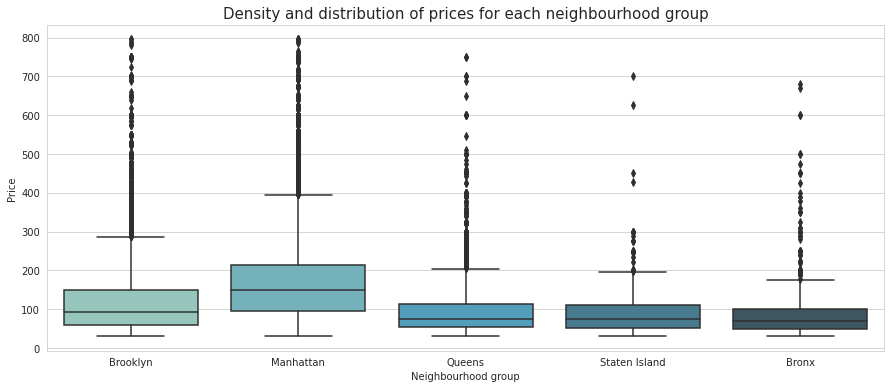

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

The data suggests that the average price of accommodations in Manhattan is higher than in other locations. We can further analyze to determine which specific room is the most expensive and which room type is the least expensive.

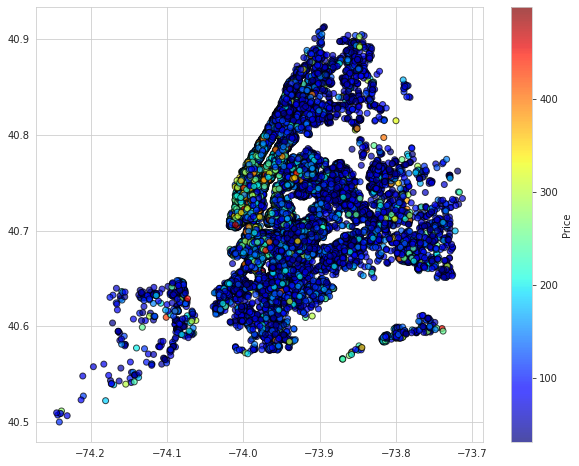

In [ ]:
df1 =df[df['price']<500]
plt.figure(figsize= (10,8))
plt.scatter(df1.longitude, df1.latitude, c = df1.price, alpha = 0.7, cmap ='jet',edgecolor = 'black')
cbar = plt.colorbar()
cbar.set_label('Price')

Manhattan tend to be more expensive than those in other areas.

## Room Type Distribution

Text(0.5, 1.0, 'Numbers in Each Room Types')

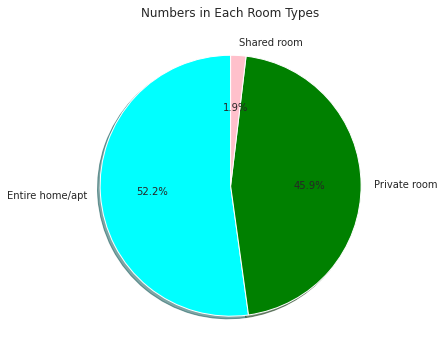

In [ ]:
plt.figure(figsize=(6,6))
numbers = df['room_type'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['cyan', 'green', 'pink'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Numbers in Each Room Types')

There are mostly entire home and private room. There is also a small portion in shared rooms.

<AxesSubplot:xlabel='room_type', ylabel='price'>

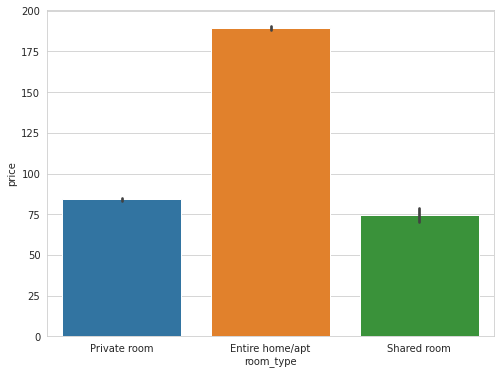

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price')

Consistent with expectations, home/apartment listings are more costly than private/shared room listings.

## Price Distribution in Each Room Type

Text(0, 0.5, 'Price')

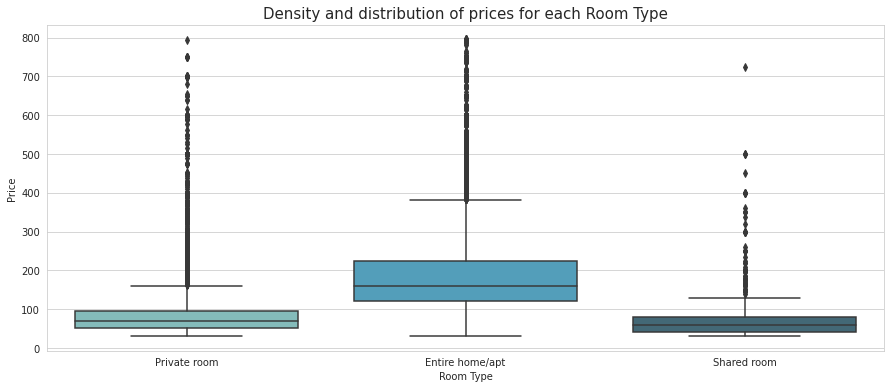

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='room_type', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel("Price")

The fact that entire homes tend to be more expensive than other types of accommodations, and private rooms are typically more expensive than shared rooms, is not surprising. This may help explain why Manhattan has higher overall prices compared to other locations, as it has a larger number of entire home listings than other areas.

## Most Expensive and The Cheapest Neighbourhoods

In [ ]:
a = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).head(20)
d = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

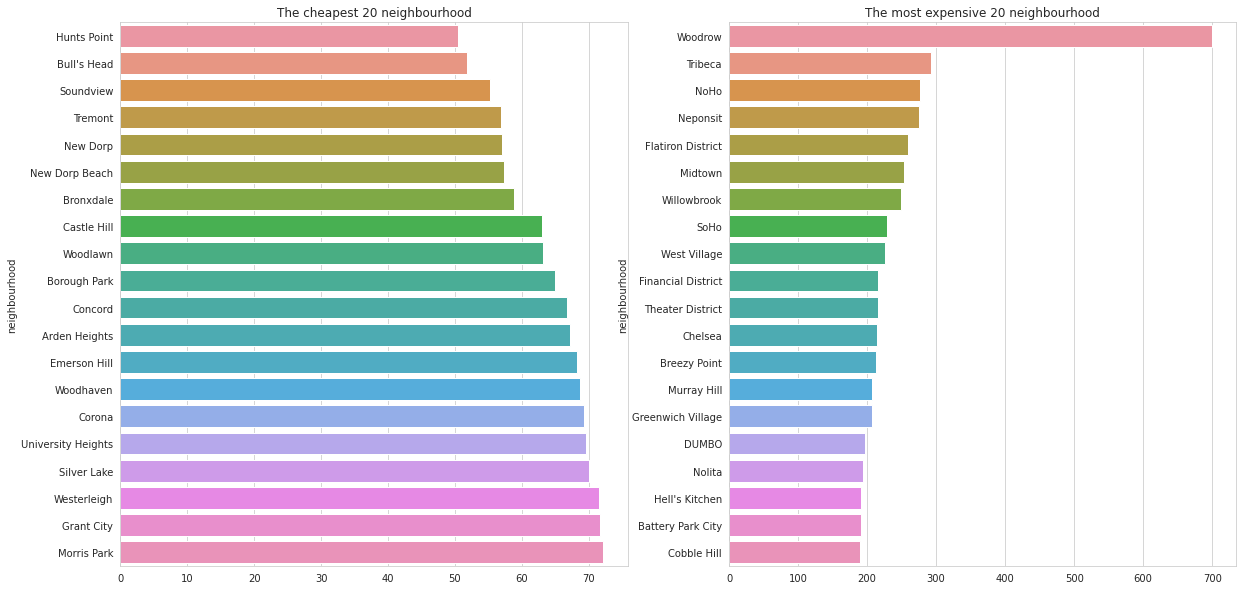

In [ ]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive 20 neighbourhood')
plt.show()

## Correlation

<ipython-input-32-42f062fa9719>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

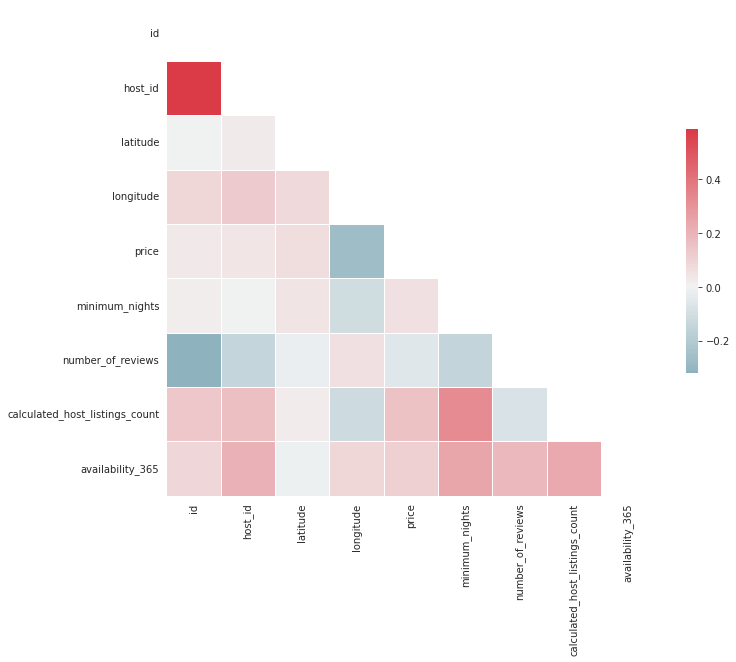

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

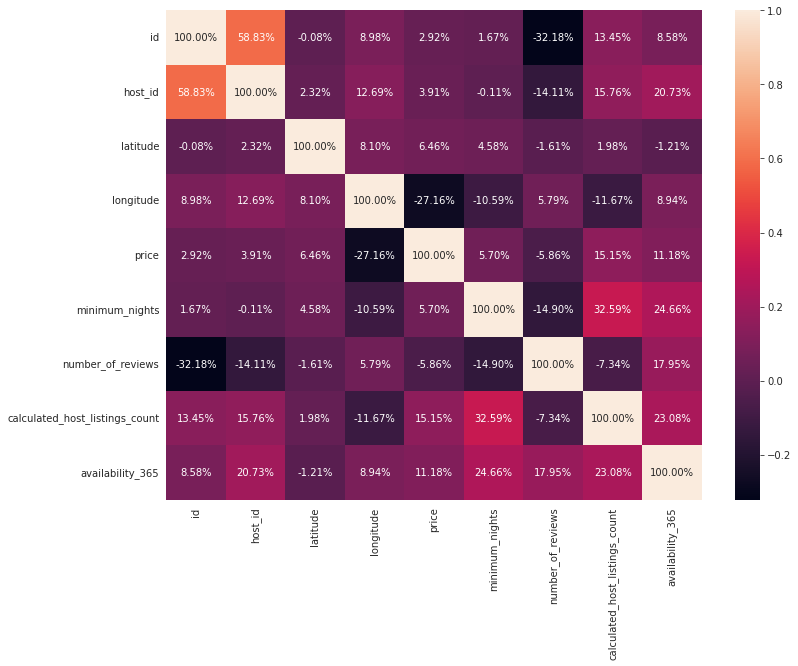

In [ ]:
# calculer la matrice de corrélation
corrmat = df.corr()

# afficher une heatmap avec seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, fmt=".2%")


Nous pouvons voir que les variables:

id et host_id sont corrélés de 58.83%


number_of_reviews et review_per_month sont corrélés de 32.59%

## Dropping Unnecessary Columns

In [ ]:
#data = data[data.price > 0]
#data.columns

We will not need host_id, reviews_per_month. Because these columns does not affect price.

In [ ]:
df.drop(columns=['host_id', 'reviews_per_month', 'id', 'longitude', 'latitude'], inplace=True)

# Preprocessing

## ENCODING categorical variables

In [ ]:
def find_categorical_columns(df):
    """
    Cette fonction prend en entrée un dataframe et retourne une liste de toutes les colonnes qui sont catégorielles.
    """
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_columns.append(col)
    return categorical_columns

# Trouver les colonnes catégorielles
categorical_columns = find_categorical_columns(df)

# Afficher les colonnes catégorielles
print(categorical_columns)

['neighbourhood_group', 'neighbourhood', 'room_type']


From the above observation, it can be inferred that the following columns: neighbourhood_group, neighbourhood, room type, are categorical. We need to encode them so that they can be used for training.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include=['object']).columns

for i in categorical:
  df[i] = LabelEncoder().fit_transform(df[i])


df.dtypes

neighbourhood_group               int64
neighbourhood                     int64
room_type                         int64
price                             int64
minimum_nights                    int64
number_of_reviews                 int64
calculated_host_listings_count    int64
availability_365                  int64
dtype: object

In [ ]:
df = df.reset_index(drop=True)

df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,107,1,149,1,9,6,365
1,2,126,0,225,1,45,2,355
2,2,93,1,150,3,0,1,365
3,1,41,0,89,1,270,1,194
4,2,61,0,80,10,9,1,0


# reduire la dataset aléatoirement

entrainer et tester les algorithmes de machine learning avec Cross validation et Grid Search prend beaucoup de temps, donc, on va diminuer la taille de la dataset.

In [ ]:
# Sélectionner un sous-ensemble de données aléatoire
data = df.sample(n=10000, random_state=42)
data.shape

(10000, 8)

# Spliting the dataset

First, we need to identify the training data and the target column. Then, we will scale the data and split it into training and test sets with a ratio of 80% for training and 20% for testing.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data.drop(columns=['price'])
y = data['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

X.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
5223,0.445709,-0.481775,-0.930845,-0.313973,-0.334785,-0.182844,-0.858443
7920,0.445709,1.377009,-0.930845,-0.313973,-0.535346,-0.182844,-0.858443
22589,-0.918150,0.996471,-0.930845,-0.435119,-0.045086,-0.182844,-0.858443
30378,-0.918150,-1.140399,0.936447,1.018629,-0.446207,-0.182844,-0.858443
18553,1.809569,1.611187,0.936447,-0.313973,1.002287,-0.182844,1.300122


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")

There are 8000 traning data
There are 2000 test data


# Models

### Decision tree sans cross validation et hyperparametres

In [ ]:
from sklearn import tree
from sklearn import metrics

tree_model = tree.DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train, y_train) # x -> features, y->target (price)
tree_model_prediction = tree_model.predict(X_test)

tree_mse = metrics.mean_squared_error(y_test, tree_model_prediction)
tree_mae = metrics.mean_absolute_error(y_test, tree_model_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = metrics.r2_score(y_test, tree_model_prediction)

print("Mean Squared Error: {}".format(tree_mse))
print("Mean Absolute Error: {}".format(tree_mae))
print("Root Mean Absolute Error: {}".format(tree_rmse))
print("R2 score: {}".format(tree_r2))

Mean Squared Error: 9989.036690124069
Mean Absolute Error: 61.126162820512825
Root Mean Absolute Error: 99.94516841810848
R2 score: -0.06402491974363689


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'apprentissage
dt.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = dt.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)

Erreur quadratique moyenne :  9800.578190124068
Coefficient de détermination (R²) :  -0.043950457454819736
Score de variance expliquée :  -0.04213498393507975
Erreur maximale :  660.0
Erreur absolue moyenne :  60.922162820512824


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'apprentissage
dt.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = dt.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  9440.74469012407
Coefficient de détermination (R²) :  -0.005621254866435166
Score de variance expliquée :  -0.004300394869246604
Erreur maximale :  660.0
Erreur absolue moyenne :  60.59816282051282


In [ ]:
prediction_dictionaries = {'Decision Tree Normal': tree_model_prediction}

In [ ]:
prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Decision Tree Normal': tree_model_prediction.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)
prediction_list

,Decision Tree Normal
Actual Values,
30,34.0
80,65.0
197,100.0
42,42.0
100,120.0
299,125.0
80,75.0
75,44.0
250,275.0


### Decision tree with k-fold et hyperparameters

### Perform hyperparameter tuning and cross-validation.

The Decision Tree Regressor uses the following parameters:

max_depth: This determines the maximum depth of the decision tree. If set to 

None, nodes will be expanded until all leaves are pure or until they contain less than the minimum number of samples required to split (min_samples_split).

min_samples_leaf: This sets the minimum number of samples required to be at a leaf node.

min_samples_split: This determines the minimum number of samples required to split an internal node.

We will perform the following steps:

Utilize grid search to fit the Decision Tree Regressor model using the parameters mentioned above.
Use 5-fold cross-validation during each iteration of grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
}
tree_grid = GridSearchCV(tree_model, parameters, refit = True, verbose = 1, n_jobs=-1, cv=5, scoring="neg_mean_squared_error") 
tree_grid.fit(X, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(f"Best parameters are {tree_grid.best_params_}") 
print("Best MSE is {}".format(tree_grid.best_score_ * -1))

Best parameters are {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best MSE is 6670.07807449041


In [ ]:
tree_model_best = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 4, min_samples_split = 4)
tree_model_best.fit(X_train, y_train) 
tree_model_prediction_best = tree_model_best.predict(X_test)

tree_mse_best = metrics.mean_squared_error(y_test, tree_model_prediction_best)
tree_mae_best = metrics.mean_absolute_error(y_test, tree_model_prediction_best)
tree_rmse_best = np.sqrt(tree_mse_best)
tree_r2_best = metrics.r2_score(y_test, tree_model_prediction_best)

print("Mean Squared Error: {}".format(tree_mse_best))
print("Mean Absolute Error: {}".format(tree_mae_best))
print("Root Mean Absolute Error: {}".format(tree_rmse_best))
print("R2 score: {}".format(tree_r2_best))

Mean Squared Error: 7355.743991843466
Mean Absolute Error: 51.62042798585298
Root Mean Absolute Error: 85.76563409573478
R2 score: 0.3580831121725746


There is a significant improvement in the R2 score, which increased from 0.15 to 0.53.

In [ ]:
prediction_dictionaries['Decision Tree-kfold-hyper'] = tree_model_prediction_best
prediction_list['Decision Tree-kfold-hyper'] = np.array(tree_model_prediction_best[:20])
prediction_list

,Decision Tree Normal,Decision Tree-kfold-hyper
Actual Values,,
30,34.0,38.156250
80,65.0,73.844444
197,100.0,133.000000
42,42.0,63.482143
100,120.0,70.342520
299,125.0,218.000000
80,75.0,73.430769
75,44.0,54.473913
250,275.0,196.423208


In [ ]:
##

## RANDOM FOREST

## Without cross validation and Hyperparameteres

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=42) #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mse = metrics.mean_squared_error(y_test, forest_model_prediction)
forest_mae = metrics.mean_absolute_error(y_test, forest_model_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = metrics.r2_score(y_test, forest_model_prediction)

print("Mean Squared Error: {}".format(forest_mse))
print("Mean Absolute Error: {}".format(forest_mae))
print("Root Mean Absolute Error: {}".format(forest_rmse))
print("R2 score: {}".format(forest_r2))

Mean Squared Error: 5517.434072165515
Mean Absolute Error: 47.8867509144724
Root Mean Absolute Error: 74.27943236297324
R2 score: 0.4122869373749589


## With kfold and hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Define the hyperparameters to search over
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
rf_grid = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print(f"Best parameters are {rf_grid.best_params_}")
print("Best MSE is {}".format(rf_grid.best_score_ * -1))

# Train a new Random Forest model using the best hyperparameters
rf_model_best = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
rf_model_best.fit(X_train, y_train)

# Evaluate the performance of the new model on the test set
rf_prediction_best = rf_model_best.predict(X_test)
rf_mse_best = metrics.mean_squared_error(y_test, rf_prediction_best)
rf_mae_best = metrics.mean_absolute_error(y_test, rf_prediction_best)
rf_rmse_best = np.sqrt(rf_mse_best)
rf_r2_best = metrics.r2_score(y_test, rf_prediction_best)

# Print the performance metrics for the new model
print("Mean Squared Error: {}".format(rf_mse_best))
print("Mean Absolute Error: {}".format(rf_mae_best))
print("Root Mean Absolute Error: {}".format(rf_rmse_best))
print("R2 score: {}".format(rf_r2_best))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: ignored

In [ ]:
# modèle plus rapide

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the hyperparameters to search over
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
rf_grid = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print(f"Best parameters are {rf_grid.best_params_}")
print("Best MSE is {}".format(rf_grid.best_score_ * -1))

# Train a new Random Forest model using the best hyperparameters
rf_model_best = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
rf_model_best.fit(X_train, y_train)

# Evaluate the performance of the new model on the test set
rf_prediction_best = rf_model_best.predict(X_test)
rf_mse_best = metrics.mean_squared_error(y_test, rf_prediction_best)
rf_mae_best = metrics.mean_absolute_error(y_test, rf_prediction_best)
rf_rmse_best = np.sqrt(rf_mse_best)
rf_r2_best = metrics.r2_score(y_test, rf_prediction_best)

# Print the performance metrics for the new model
print("Mean Squared Error: {}".format(rf_mse_best))
print("Mean Absolute Error: {}".format(rf_mae_best))
print("Root Mean Absolute Error: {}".format(rf_rmse_best))
print("R2 score: {}".format(rf_r2_best))


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Créer le modèle
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
xgb_predictions = xgb_model.predict(X_test)

# Calculer les métriques d'évaluation
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Afficher les résultats
print("Mean Squared Error: {:.2f}".format(xgb_mse))
print("Mean Absolute Error: {:.2f}".format(xgb_mae))
print("Root Mean Absolute Error: {:.2f}".format(xgb_rmse))
print("R2 Score: {:.2f}".format(xgb_r2))


Mean Squared Error: 5403.70
Mean Absolute Error: 47.31
Root Mean Absolute Error: 73.51
R2 Score: 0.42


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Define the hyperparameters to search over
parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [50, 100, 200]
}

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print(f"Best parameters are {xgb_grid.best_params_}")
print("Best MSE is {}".format(xgb_grid.best_score_ * -1))

# Train a new XGBoost model using the best hyperparameters
xgb_model_best = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, colsample_bytree=0.5, n_estimators=500, random_state=42)
xgb_model_best.fit(X_train, y_train)

# Evaluate the performance of the new model on the test set
xgb_prediction_best = xgb_model_best.predict(X_test)
xgb_mse_best = metrics.mean_squared_error(y_test, xgb_prediction_best)
xgb_mae_best = metrics.mean_absolute_error(y_test, xgb_prediction_best)
xgb_rmse_best = np.sqrt(xgb_mse_best)
xgb_r2_best = metrics.r2_score(y_test, xgb_prediction_best)

# Print the performance metrics for the new model
print("Mean Squared Error: {}".format(xgb_mse_best))
print("Mean Absolute Error: {}".format(xgb_mae_best))
print("Root Mean Absolute Error: {}".format(xgb_rmse_best))
print("R2 score: {}".format(xgb_r2_best))


In [ ]:
# modèle plus rapide
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Créer le modèle XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Définir l'espace de recherche des hyperparamètres
parameters = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et la meilleure MSE
print(f"Best parameters are {xgb_grid.best_params_}")
print("Best MSE is {}".format(xgb_grid.best_score_ * -1))

# Créer un nouveau modèle XGBoost avec les meilleurs hyperparamètres
xgb_model_best = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
xgb_model_best.fit(X_train, y_train)

# Faire des prédictions sur les données de test
xgb_prediction_best = xgb_model_best.predict(X_test)

# Calculer les métriques d'évaluation
xgb_mse_best = metrics.mean_squared_error(y_test, xgb_prediction_best)
xgb_mae_best = metrics.mean_absolute_error(y_test, xgb_prediction_best)
xgb_rmse_best = np.sqrt(xgb_mse_best)
xgb_r2_best = metrics.r2_score(y_test, xgb_prediction_best)

# Afficher les résultats
print("Mean Squared Error: {}".format(xgb_mse_best))
print("Mean Absolute Error: {}".format(xgb_mae_best))
print("Root Mean Absolute Error: {}".format(xgb_rmse_best))
print("R2 score: {}".format(xgb_r2_best))


# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Créer le modèle
base_estimator = DecisionTreeRegressor(max_depth=4, random_state=42)
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Entraîner le modèle
adaboost_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
adaboost_predictions = adaboost_model.predict(X_test)

# Calculer les métriques d'évaluation
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
adaboost_mae = mean_absolute_error(y_test, adaboost_predictions)
adaboost_rmse = np.sqrt(adaboost_mse)
adaboost_r2 = r2_score(y_test, adaboost_predictions)

# Afficher les résultats
print("Mean Squared Error: {:.2f}".format(adaboost_mse))
print("Mean Absolute Error: {:.2f}".format(adaboost_mae))
print("Root Mean Absolute Error: {:.2f}".format(adaboost_rmse))
print("R2 Score: {:.2f}".format(adaboost_r2))


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Create a Decision Tree model to be used as the base estimator for AdaBoost
base_estimator = DecisionTreeRegressor()

# Define the hyperparameters to search over
parameters = {
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create an AdaBoost model
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Use GridSearchCV to search for the best hyperparameters
ada_grid = GridSearchCV(estimator=ada_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
ada_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print(f"Best parameters are {ada_grid.best_params_}")
print("Best MSE is {}".format(ada_grid.best_score_ * -1))

# Train a new AdaBoost model using the best hyperparameters
ada_model_best = AdaBoostRegressor(base_estimator=base_estimator(max_depth=5), n_estimators=300, learning_rate=0.1, random_state=42)
ada_model_best.fit(X_train, y_train)

# Evaluate the performance of the new model on the test set
ada_prediction_best = ada_model_best.predict(X_test)
ada_mse_best = metrics.mean_squared_error(y_test, ada_prediction_best)
ada_mae_best = metrics.mean_absolute_error(y_test, ada_prediction_best)
ada_rmse_best = np.sqrt(ada_mse_best)
ada_r2_best = metrics.r2_score(y_test, ada_prediction_best)

# Print the performance metrics for the new model
print("Mean Squared Error: {}".format(ada_mse_best))
print("Mean Absolute Error: {}".format(ada_mae_best))
print("Root Mean Absolute Error: {}".format(ada_rmse_best))
print("R2 score: {}".format(ada_r2_best))


In [ ]:
# modèle plus rapide

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Create a Decision Tree model to be used as the base estimator for AdaBoost
base_estimator = DecisionTreeRegressor()

# Define the hyperparameters to search over
parameters = {
    'base_estimator__max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.3, 0.5]
}

# Create an AdaBoost model
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Use GridSearchCV to search for the best hyperparameters
ada_grid = GridSearchCV(estimator=ada_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
ada_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print(f"Best parameters are {ada_grid.best_params_}")
print("Best MSE is {}".format(ada_grid.best_score_ * -1))

# Train a new AdaBoost model using the best hyperparameters
ada_model_best = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=200, learning_rate=0.1, random_state=42)
ada_model_best.fit(X_train, y_train)

# Evaluate the performance of the new model on the test set
ada_prediction_best = ada_model_best.predict(X_test)
ada_mse_best = metrics.mean_squared_error(y_test, ada_prediction_best)
ada_mae_best = metrics.mean_absolute_error(y_test, ada_prediction_best)
ada_rmse_best = np.sqrt(ada_mse_best)
ada_r2_best = metrics.r2_score(y_test, ada_prediction_best)

# Print the performance metrics for the new model
print("Mean Squared Error: {}".format(ada_mse_best))
print("Mean Absolute Error: {}".format(ada_mae_best))
print("Root Mean Absolute Error: {}".format(ada_rmse_best))
print("R2 score: {}".format(ada_r2_best))
